In [1]:
# importy, przydatne funkcje

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

# np.vander(x, degree + 1)
# przyjmuje listę liczb x
# zwraca tabelę po zmianie zmiennych na wielomian stopnia x
# można sobie przetestować dla lepszego zrozumienia

def f(size):
    '''
    zwraca dwie listy przykładowych danych (x i y) o długości 'size'
    w tym wypadku przykładowa prawdziwa funkcja to y(x) = 2 * sin(1.5 * x)
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    '''
    zwraca dwie listy przykładowych danych (x i y) o długości 'size'
    podobnie jak f, ale z dodanym szumem
    uwaga - współrzędna x jest "losowana" z rozkładu jednostajnego
    (dla naszych zastosowań nie robi to większej różnicy, ale porządni informatycy
    mogą chcieć zastąpić linspace przez prawdziwe losowanie)
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + np.random.randn(x.size)
    return (x,y)

def fit_polynomial(x, y, degree):
    '''
    zwraca nauczony model regresji z wielomianową zmianą zmiennych
    (x,y): dane treningowe
    degree: stopień wielomianu
    '''
    # To juz umiemy sami zaimplementować!
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    zwraca predykcję nauczonego modelu regresji z wielomianową zmianą zmiennych
    x: dane do predykcji
    '''
    degree = model.coef_.size - 1 # wyciągamy stopień wielomianu z modelu
    y = model.predict(np.vander(x, degree + 1))
    return y

f_x, f_y = f(50) # tym narysujemy sinusa

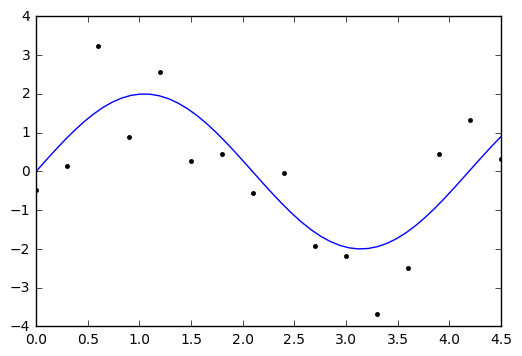

In [2]:
# Przykładowe dane, z których próbujemy się nauczyć prawdziwego rozkładu prawdopodobieństwa
x, y = sample(16)
plt.plot(x, y, 'k.')
plt.plot(f_x, f_y)

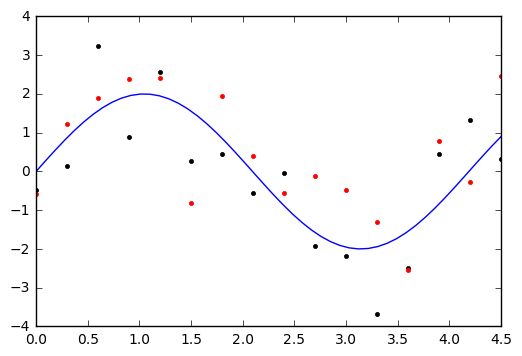

In [3]:
# Inny zbior danych, ale pochodzący z tego samego rozkładu!
prev_x, prev_y = x, y
x, y = sample(16)
plt.plot(prev_x, prev_y, 'k.', color='black')
plt.plot(x, y, 'k.', color='r')
plt.plot(f_x, f_y)

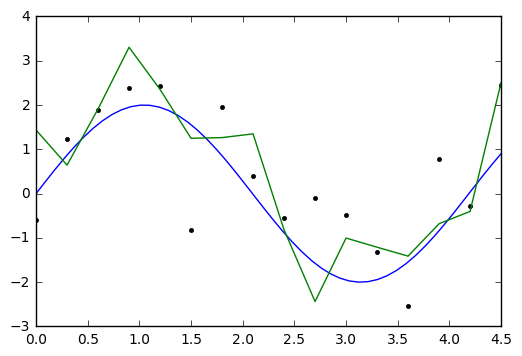

In [4]:
# Tu sie dopasowalismy
X_train, y_train = sample(16)
overfitted_model = fit_polynomial(X_train, y_train, 15)
p_y = apply_polynomial(overfitted_model, X_train)
plt.plot(f_x, f_y)
plt.plot(X_train, y, 'k.')
plt.plot(X_train, p_y)

## Cwiczenie 0 [0 pkt] 

(Do zrobienia przed przejściem dalej)

Jaki ``Expected loss`` będzie miał model "overfitted_model"?

Hint: mamy możliwość samplowania punktów z rozkładu $p(\mathbf{x},  y)$

In [5]:
size = 1000000
x, y = sample(size)

p_y = apply_polynomial(overfitted_model, x)

EL = sum((p_y - y)**2)/size
EL

40.831351340818919

## Ćwiczenie 1 [2 pkt]

W idealnym świecie mielibyśmy dostęp do procesu generowania danych i moglibyśmy znaleźć optymalny model (a przynajmniej wybrać stopień wielomianu w regresji liniowej) oraz oszacować jego bias i variance.

1. Napisz kod, który dla ustalonego stopnia wielomianu ($K$) liczy bias, variance oraz MSE tego modelu (wielkości te estymujemy podobnie jak w ćwiczeniu 0.).

2. Dla jakich wartości $K$ można powiedzieć że mamy model "High variance/low bias"?

3. Jaka wartość $K$ daje minimum błędu MSE?

Jeśli macie Państwo problem z wymyśleniem wzoru na powyższe wielkości, proszę jeszcze raz przeczytać ze zrozumieniem sekcję o rozkładzie błędu. Kluczowe jest to, że bias liczymy średnio po różnych zestawach danych $D$ - czym są w tym wypadku dane $D$? Jak zrobić kilkadziesiąt/set różnych takich zestawów? Czy rozmiar danych $D$ może ulegać zmianie? (jeśli nie, to proszę ustawić go np. na 43 lub inną liczbę tego rzędu).

Oczekiwany wynik (z dokładnością do wartości) - poziomo $K$, pionowo bias/variance/MSE: 

<img src="figures/L5/L5_1_wynik.png">

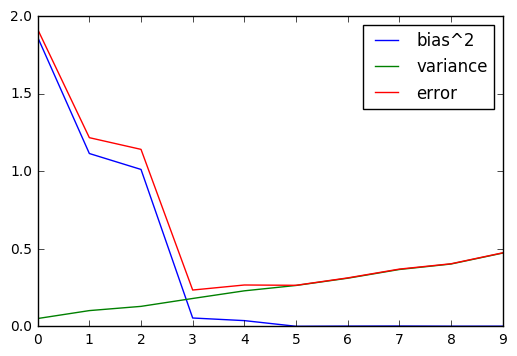

In [6]:
size_train = 20
size_test = 100
iterations = 200
degree = 10

bias = np.zeros(degree)
mse = np.zeros(degree)
var = np.zeros(degree)



for k in range(0, degree):
    models = []
    y = []
    p_y = []
    p_y_mean = np.zeros(size_test)
    y_mean = np.zeros(size_test)
    x = sample(size)[0]
    
    for i in range(iterations):
        x_train, y_train = sample(size_train)
        models.append(fit_polynomial(x_train, y_train, k))
        
        x_test, y_test = f(size_test)
        
        y.append(y_test)
        p_y.append(apply_polynomial(models[i], x_test))
        p_y_mean += p_y[i]/iterations
        y_mean += y_test/iterations
    
    for i in range(iterations):
        mse[k] += sum((y[i]-p_y[i])**2) / (iterations * size_test)
        var[k] += sum((p_y[i]-p_y_mean)**2) / (iterations * size_test)
    bias[k] = sum((p_y_mean-y_test)**2/size_test)
    
plt.plot(bias, label = "bias^2")
plt.plot(var, label = "variance")
plt.plot(mse, label = "error")


plt.legend()

1. Wykres powyżej
2. Dla wartości $K$ powyżej 5 bias jest marginalny, a wariancja duża, mamy więc do czynienia z sytuacją high viariance/low bias.
3. Minimum MSE jest osiągane dla $K$ równego 3 lub 5 (mała różnica, mamy wybór, czy chcemy mieć mniejszy bias czy wariancję).

## Cwiczenie 2 [1 pkt]

Im więcej podziałów w Cross Validation tym mniejczy czy większy variance **estymatora**? A jak zmienia się jego bias? Odpowiedź uzasadnij.

Wraz ze zwiększaniem się liczby podziałów wzrasta wariancja, ale maleje bias. Dla skrajnego przypadku leave one out można to uzasadniać faktem, że zbiory trenujące pokrywają się niemal w całości, stąd też zmienne losowe będą wysoko skorelowane, a co za tym idzie wariancja ich sumy będzie wysoka. Rozwiązanie problemu w ogólności jest jednak trudne, wyniki eksperymentalne wskazują, że najbardziej optymalne jest podzielenie zbioru na $10$ podzbiorów. 

## Regularyzacja - podejście "praktyczne"

Chcemy uniemożliwić regresji dopasowanie wielomianu zbyt idealnie do danych treningowych (patrz wykres overfitted_model). Nie chcemy sztucznie ograniczać wymiaru wielomianu. Sensowne wydaje się ograniczenie norm wag:

$$ C(M) = \sum_i ( f(\mathbf{x_i}) - y_i)^2 + \lambda ||\mathbf{w}||_2^2 $$

Ograniczenie wag sprawi, że wyliczony przez regresję wielomian będzie miał łagodniejszy przebieg i tym samym mniej zoverfituje.

## Cwiczenie 3 [1 pkt]

Pokaż, że logposterior ($log p(\theta | X, y)$) dla regresji liniowej ma taką postać jak $C(M)$.

Dla regresji liniowej mamy:

$$ y_{n} = w_{n} x_{n} + \epsilon, $$

gdzie $\epsilon$ ma rozkład Gaussa o parametrach o średniej $0$ i warancji $\sigma^{2}$.

Likelihood będzie więc miał postać:

$$ \prod_{n=1}^N \mathcal{N}(y_n|w_{n} x_n,\sigma^2). $$

Aby uzyskać posterior, musimy przemnożyć to przez prior, który w tym wypadku pełni funkcję regulacyjną. Weźmy za ten prior $\mathcal{N}(w_{n}|0,\lambda^{-1})$. Posterior przyjmie wtedy postać:

$$ \prod_{n=1}^N \mathcal{N}(y_n|w_{n} x_n,\sigma^2) \mathcal{N}(w_{n}|0,\lambda^{-1}). $$

Biorąc logarytm z powyższego, otrzymujemy:

$$ \sum_{n=1}^N -\frac{1}{\sigma^2}(y_n-w_{n} x_n)^2 - \lambda w_{n}^2 + \mbox{const}. $$

Mnożąc razy $\sigma^2$ (podmieniając $\lambda$ na $\lambda \sigma^2$) i zauważając, że $f(\mathbf{x_i}) = w_{n} x_n$, mamy log posterior równy:

$$ \sum_{n=1}^N -(y_n-f(\mathbf{x_i}))^2 - \lambda w_{n}^2 + \mbox{const}. $$


Naszym celem jest maksymalizacja logposterior. Osiągamy to, przez minimalizację wyrażenia:

$$ \sum_{n=1}^N (y_n-f(\mathbf{x_i}))^2 + \lambda w_{n}^2 $$

A to nic innego, jak funkcja kosztu $C(M)$.